In [4]:
import pandas as pd
import hashlib
import spacy
nlp = spacy.load("pt_core_news_sm")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans #, MiniBatchKMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import nltk

In [ ]:
# ! grep -r  -C 10 --group-separator="==========" -Ei "[0-9]{2,2}\.[0-9]{3,3}\.[0-9]{3,3}.[0-9]{4,4}-[0-9]{2,2}"  * > trechos_com_cnpj.txt

In [13]:
with open("/mnt/hd-atlantico/wesley/datasets/doutorado/ok_busca_de_palavras_chaves/trechos_com_cnpj.txt", "r") as selected_contexts_file:
  file_content = selected_contexts_file.read()
  file_content_splitted = file_content.split("==========")

file_content_splitted[0:10]

["-                     Assinado de forma digital\n-                     por PMU\n-\n-\n-\n-PMU\n-                     DN: cn=PMU, o=PMU,\n:                     ou=18.428.839/0001-90,\n-                     email=portavozgoverno@\n-                     uberabadigital.com.br,\n-                     c=BR\n-                     Dados: 2020.03.24\n-                     19:26:38 -03'00'\n-\n-\n-\n-\n-                                     Órgão Oficial do Município – Uberaba, 24 de Março de 2020 – Ano 25 Nº 1799 – www.portavozuberaba.com.br\n",
 '\n-\n-                                                       DOM | Edição 4832 | Página 17\n-\x0c                                                    Manaus, terça-feira, 5 de maio de 2020\n-\n-                                                                                                                        EXTRATO\n-                         MANAUS PREVIDÊNCIA\n-                                                                             1. ESPÉC

In [57]:
# sents = list(t.sents)
# len(sents)
# sents[31].text.replace("-\n"," ")

In [14]:
# sentencas = sents[:2000]
# sentencas = list(t.sents)[:2000]
# sentencas = list(t.sents)

CLUSTERS = 30

# tentar window_size  menor que desloc
window_size = 12
desloc = 10
# max_size = len(sentencas)
# r = list(range(desloc,max_size,desloc))

# corpus = []
labels = []
j = 0
TERMO = "compra"
LOCALIZACOES_TERMO = []
# for i in r:
#     snippet = " ".join( [ s.text.replace("-\n","").replace("\n","") for s in sentencas[i-desloc:i+window_size-desloc] ] )
#     clas_ = TERMO in snippet
#     corpus.append( snippet )
#     labels.append( clas_ )
#     if clas_:
#         print(f"Está no item {j}")
#         LOCALIZACOES_TERMO.append(j)
#     j += 1
# #     print("-" * 20)
# print( f"Tamanho do corpus: { len(corpus) }" )

In [16]:
# [x for x in corpus if "teste rápido" in x ]
corpus[:10]
# labels[:10]

[]

In [17]:
corpus = file_content_splitted

In [18]:
vectorizer = TfidfVectorizer(max_df=0.1, 
                             min_df=3,
                             max_features=5000,
                             stop_words=nltk.corpus.stopwords.words('portuguese'),
                             use_idf=True)


X = vectorizer.fit_transform(corpus)

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans = KMeans(n_clusters=CLUSTERS, 
                init='random',  # 'k-means++'
                max_iter=100, 
                n_init=1, 
                verbose=True)

kmeans.fit(X)

print("Silhouette Coefficient: %0.3f"     % metrics.silhouette_score(X, kmeans.labels_, sample_size=1000))

Initialization complete
Iteration 0, inertia 66757.64199435587
Iteration 1, inertia 35489.44252900769
Iteration 2, inertia 34353.26681630088
Iteration 3, inertia 33928.36316922604
Iteration 4, inertia 33777.63841809334
Iteration 5, inertia 33723.722646743016
Iteration 6, inertia 33676.562143778145
Iteration 7, inertia 33598.095299605026
Iteration 8, inertia 33506.17275026153
Iteration 9, inertia 33477.33800783569
Iteration 10, inertia 33445.84666729277
Iteration 11, inertia 33406.77683892512
Iteration 12, inertia 33366.24942547807
Iteration 13, inertia 33340.94123573145
Iteration 14, inertia 33328.48087350164
Iteration 15, inertia 33319.5031347132
Iteration 16, inertia 33314.019131010136
Iteration 17, inertia 33311.99620114525
Iteration 18, inertia 33310.20439374925
Iteration 19, inertia 33309.70422292712
Iteration 20, inertia 33309.555219290494
Iteration 21, inertia 33309.51074306905
Iteration 22, inertia 33309.45700599847
Iteration 23, inertia 33309.37435012368
Iteration 24, inertia 

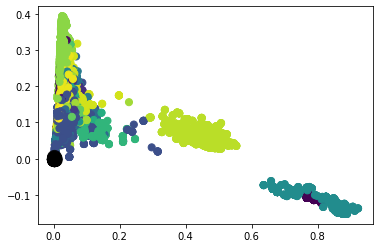

In [19]:
SVD = TruncatedSVD(n_components=2).fit(X)
data2D = SVD.transform(X)


y_kmeans = kmeans.predict(X)

plt.scatter(data2D[:, 0], data2D[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [20]:
len(file_content_splitted)

40801

In [24]:
# y_kmeans[93]
# data2D[93]
# vectorizer.decode(X[93])
# vectorizer.decode("Este é um teste")
for n_clu in range(3603,3610):
# for n_clu in LOCALIZACOES_TERMO:
    print(">>> ", f"{n_clu}", " " ,"=" * 30, "   [" , y_kmeans[n_clu],"]   ", "=" * 30 )
    print(corpus[n_clu])

>>>  3603   ==============================    [ 17 ]    ==============================

-
-Objeto: REGISTRO DE PREÇOS PARA FUTURAS E EVENTUAIS AQUISIÇÕES DE MEDICAMENTOS
-
-
-                                       FORNECEDOR                                               CNPJ
-
-
-    Lote                                         Desc.                                 Marca               Quant.
-
-
:            COSTA CAMARGO COMÉRCIO DE PRODUTOS HOSPITALARES LTDA                          36.325.157/0001-34
-
-
-    02                  Clomipramina, cloridrato 10 mg- comprimido ou drágea           CLO                  9.000
-
-
:                             SEMEAR DISTRIBUIDORA EIRELI- EPP                             10.269.296/0001-02
-
-
-    01              Cefazolina sódica 1 G, pó para solução injetável - Frasco ampola   BLAU                 3.000
-
-
-
-Serra, 27 de março de 2020
-
-
-

>>>  3604   ==============================    [ 7 ]    ==============================

-
-
-PREGÃO

In [109]:
# ttt = list( range(1,CLUSTERS) )
from collections import Counter

Counter(y_kmeans)


Counter({6: 484,
         21: 41,
         7: 115,
         28: 27,
         12: 38,
         14: 39,
         0: 40,
         16: 133,
         18: 102,
         17: 156,
         27: 552,
         26: 87,
         20: 91,
         9: 28,
         5: 128,
         19: 57,
         22: 75,
         25: 102,
         3: 102,
         29: 18,
         1: 44,
         10: 76,
         8: 117,
         24: 10,
         13: 110,
         23: 24,
         11: 70,
         4: 38,
         2: 30,
         15: 23})